# Testing Gravity with Gravitational Lensing
Our data model is:
    \begin{equation}
        Dx=ax+by+c+\alpha E_{x}
    \end{equation}
    \begin{equation}
        Dy = dx+ey+f+\alpha E_{y}
    \end{equation}

with *a, b, c, d, e, f* nuisance parameters and *$\alpha$* our parameter that we want to infer to constrain the bending angle to agree with Einstein's theory of General Relativity or Newton's theory of Gravity.

The data, d, is the measurements *(Dx, Dy)* between eclipse plate and a reference/scale plate.
The model, M, are radial displacements, *$\alpha$*, in arcseconds for light grazing the sun.
Our parameter set is *{$\alpha$, a, b, c, d, e, f}*.
The likelihood distribution, we *assume*, to be Gaussian.
The prior is assumed to be uniformly distributed.

We might want to consider:

    1. The reference plate may not be centered correctly.
    2. The plates may be rotated with respect to each other.
    3. The eclipse plate may be scaled in size.
 
We assume a Gaussian likelihood such that:
\begin{equation}
     L(\theta|d) \propto \exp^{\frac{(-Dx-(ax+by+c+\alpha E_{x}))^2}{2\sigma^2}}
\end{equation}

since we only use the displacement data.
We are given data for 7 stars, thus, the likelihood becomes:
\begin{equation}
    L(\theta|d) \propto \prod_{i=1}^{7} \exp^{\frac{(-Dx_{i}-(ax_{i}+by_{i}+c+\alpha E_{x_{i}}))^2}{2\sigma_{i}^2}}
\end{equation}

We will start by implementing the data model. 

In [5]:
# import useful packages
import numpy as np
import scipy
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# random seeding
np.random.seed(3)

    
# ---------------- The Data Model ---------------------
# Define the data model: the displacements for each star on each plate
def Dx_11(alpha, a, b, c):
    return c - 0.160 * b - 1.261 * a - 0.587 * alpha/19.8
def Dy_11(alpha, d, e, f):
    return f - 1.261 * d - 0.160 * e - 0.036 * alpha/19.8

def Dx_5(alpha, a, b, c):
    return c - 1.107 * b - 0.160 * a - 0.557 * alpha/19.8
def Dy_5(alpha, d, e, f):
    return f - 0.160 * d - 1.107 * e - 0.789 * alpha/19.8

def Dx_4(alpha, a, b, c):
    return c + 0.472 * b + 0.334 * a - 0.186 * alpha/19.8
def Dy_4(alpha, d, e, f):
    return f + 0.334 * d + 0.472 * e + 1.336 * alpha/19.8

def Dx_3(alpha, a, b, c):
    return c + 0.360 * b + 0.348 * a - 0.222 * alpha/19.8
def Dy_3(alpha, d, e, f):
    return f + 0.348 * d + 0.360 * e + 1.574 * alpha/19.8

def Dx_6(alpha, a, b, c):
    return c - 1.099 * b + 0.587 * a + 0.080 * alpha/19.8
def Dy_6(alpha, d, e, f):
    return f + 0.587 * d + 1.099 * e + 0.726 * alpha/19.8

def Dx_10(alpha, a, b, c):
    return c + 1.321 * b + 0.860 * a + 0.158 * alpha/19.8
def Dy_10(alpha, d, e, f):
    return f + 0.860 * d + 1.321 * e + 0.589 * alpha/19.8

def Dx_2(alpha, a, b, c):
    return c - 0.328 * b + 1.079 * a + 1.540 * alpha/19.8
def Dy_2(alpha, d, e, f):
    return f + 1.079 * d - 0.328 * e - 0.156 * alpha/19.8

# We assume a uniform prior distribution: pi(theta) = const
nsims = 10
# we are told alpha=1.75 so sample around this
alpha = stats.uniform(-0.75, 2+0.75).rvs(nsims)
# uniform distribution of parameters denoted as random variables
a = stats.uniform(-1., 2.).rvs(nsims) # rvs for random variable initialisation
b = stats.uniform(-1., 2.).rvs(nsims)
c = stats.uniform(-1., 2.).rvs(nsims)
d = stats.uniform(-1., 2.).rvs(nsims)
e = stats.uniform(-1., 2.).rvs(nsims)
f = stats.uniform(-1., 2.).rvs(nsims)


# array of x- and y-displacements of the given stars
xs = np.array([Dx_11(alpha, a, b, c),
               Dx_5(alpha, a, b, c),
               Dx_4(alpha, a, b, c),
               Dx_3(alpha, a, b ,c),
               Dx_6(alpha, a, b, c),
               Dx_10(alpha, a, b ,c),
               Dx_2(alpha, a, b, c)])

ys = np.array([Dy_11(alpha, d, e, f),
               Dy_5(alpha, d, e, f),
               Dy_4(alpha, d, e, f),
               Dy_3(alpha, d, e, f),
               Dy_6(alpha, d, e, f),
               Dy_10(alpha, d, e, f),
               Dy_2(alpha, d, e, f)])

# Using comparison plate 14_2a
dx_1 = np.array([-1.411 + 1.500 - (-0.478 + 0.552),
                 -1.048 + 1.500 - (-0.544 + 0.552),
                 -1.216 + 1.500 - (-0.368 + 0.552),
                 -1.237 + 1.500 - (-0.350 + 0.552),
                 -1.342 + 1.500 - (-0.317 + 0.552),
                 -1.289 + 1.500 - (-0.272 + 0.552),
                 -0.789 + 1.500 - (-0.392 + 0.552)])

dy_1 = np.array([-0.554 + 0.554 - (-0.109 + 0.206),
                 -0.338 + 0.554 - (-0.204 + 0.206),
                 +0.114 + 0.554 - (-0.136 + 0.206),
                 +0.150 + 0.554 - (-0.073 + 0.206),
                 +0.124 + 0.554 - (-0.144 + 0.206),
                 +0.205 + 0.554 - (-0.146 + 0.206),
                 +0.109 + 0.554 - (-0.182 + 0.206)])

dx_2 = np.array([-1.416 + 1.500 - (-0.478 + 0.552),
                 -1.221 + 1.500 - (-0.544 + 0.552),
                 -1.054 + 1.500 - (-0.368 + 0.552),
                 -1.079 + 1.500 - (-0.350 + 0.552),
                 -1.012 + 1.500 - (-0.317 + 0.552),
                 -0.999 + 1.500 - (-0.272 + 0.552),
                 -0.733 + 1.500 - (-0.396 + 0.552)])

dy_2 = np.array([-1.324 + 1.324 - (-0.109 + 0.206),
                 -1.312 + 1.324 - (-0.204 + 0.206),
                 -0.944 + 1.324 - (-0.136 + 0.206),
                 -0.862 + 1.324 - (-0.073 + 0.206),
                 -0.932 + 1.324 - (-0.144 + 0.206),
                 -0.948 + 1.324 - (-0.146 + 0.206),
                 -1.019 + 1.324 - (-0.182 + 0.206)])

dx_3 = np.array([+0.592 - 0.500 - (-0.478 + 0.552),
                 +0.756 - 0.500 - (-0.544 + 0.552),
                 +0.979 - 0.500 - (-0.368 + 0.552),
                 +0.958 - 0.500 - (-0.350 + 0.552),
                 +1.052 - 0.500 - (-0.317 + 0.552),
                 +1.157 - 0.500 - (-0.272 + 0.552),
                 +1.256 - 0.500 - (-0.396 + 0.552)])

dy_3= np.array([+0.956 - 0.843 - (-0.109 + 0.206),
                +0.843 - 0.843 - (-0.204 + 0.206),
                +1.172 - 0.843 - (-0.136 + 0.206),
                +1.244 - 0.843 - (-0.073 + 0.206),
                +1.197 - 0.843 - (-0.144 + 0.206),
                +1.211 - 0.843 - (-0.146 + 0.206),
                +0.924 - 0.843 - (-0.182 + 0.206)])

dx_4 = np.array([+0.563 - 0.500 - (-0.478 + 0.552),
                 +0.683 - 0.500 - (-0.544 + 0.552),
                 +0.849 - 0.500 - (-0.368 + 0.552),
                 +0.861 - 0.500 - (-0.350 + 0.552),
                 +0.894 - 0.500 - (-0.317 + 0.552),
                 +0.934 - 0.500 - (-0.272 + 0.552),
                 +1.177 - 0.500 - (-0.396 + 0.552)])

dy_4 = np.array([+1.238 - 1.226 - (-0.109 + 0.206),
                 +1.226 - 1.226 - (-0.204 + 0.206),
                 +1.524 - 1.226 - (-0.136 + 0.206),
                 +1.587 - 1.226 - (-0.073 + 0.206),
                 +1.564 - 1.226 - (-0.144 + 0.206),
                 +1.522 - 1.226 - (-0.146 + 0.206),
                 +1.373 - 1.226 - (-0.182 + 0.206)])

dx_5 = np.array([+0.406 - 0.400 - (-0.478 + 0.552),
                 +0.468 - 0.400 - (-0.544 + 0.552),
                 +0.721 - 0.400 - (-0.368 + 0.552),
                 +0.733 - 0.400 - (-0.350 + 0.552),
                 +0.798 - 0.400 - (-0.317 + 0.552),
                 +0.864 - 0.400 - (-0.272 + 0.552),
                 +0.995 - 0.400 - (-0.396 + 0.552)])

dy_5 = np.array([+0.970 - 0.861 - (-0.109 + 0.206),
                 +0.861 - 0.861 - (-0.204 + 0.206),
                 +1.167 - 0.861 - (-0.136 + 0.206),
                 +1.234 - 0.861 - (-0.073 + 0.206),
                 +1.130 - 0.861 - (-0.144 + 0.206),
                 +1.119 - 0.861 - (-0.146 + 0.206),
                 +0.935 - 0.861 - (-0.182 + 0.206)])

# Plate 6 was not used!

dx_7 = np.array([-1.456 + 1.500 - (-0.478 + 0.552),
                 -1.267 + 1.500 - (-0.544 + 0.552),
                 -1.028 + 1.500 - (-0.368 + 0.552),
                 -1.010 + 1.500 - (-0.350 + 0.552),
                 -0.888 + 1.500 - (-0.317 + 0.552),
                 -0.820 + 1.500 - (-0.272 + 0.552),
                 -0.768 + 1.500 - (-0.396 + 0.552)])

dy_7 = np.array([+0.964 - 0.777 - (-0.109 + 0.206),
                 +0.777 - 0.777 - (-0.204 + 0.206),
                 +1.142 - 0.777 - (-0.136 + 0.206),
                 +1.185 - 0.777 - (-0.073 + 0.206),
                 +1.125 - 0.777 - (-0.144 + 0.206),
                 +1.072 - 0.777 - (-0.146 + 0.206),
                 +0.892 - 0.777 - (-0.182 + 0.206)])

dx_8 = np.array([-1.285 + 1.300 - (-0.478 + 0.552),
                 -1.152 + 1.300 - (-0.544 + 0.552),
                 -0.927 + 1.300 - (-0.368 + 0.552),
                 -0.897 + 1.300 - (-0.350 + 0.552),
                 -0.838 + 1.300 - (-0.317 + 0.552),
                 -0.768 + 1.300 - (-0.272 + 0.552),
                 -0.585 + 1.300 - (-0.396 + 0.552)])

dy_8 = np.array([-1.195 + 1.322 - (-0.109 + 0.206),
                 -1.332 + 1.322 - (-0.204 + 0.206),
                 -0.930 + 1.322 - (-0.136 + 0.206),
                 -0.894 + 1.322 - (-0.073 + 0.206),
                 -0.937 + 1.322 - (-0.144 + 0.206),
                 -0.964 + 1.322 - (-0.146 + 0.206),
                 -1.166 + 1.322 - (-0.182 + 0.206)])

# error on the measurements
sigma_err = 0.05
# array of star numbers
stars = np.array([11, 5, 4, 3, 6, 10, 2])
# the value of alpha based of General Relativity theory
alpha_GR = 1.75
# the value of alpha based on Newtonian physics
alpha_N = 0.90

As well as the data points we are given, we will simulate some data points.

Now we can plot the simulated data points vs the data we are given.

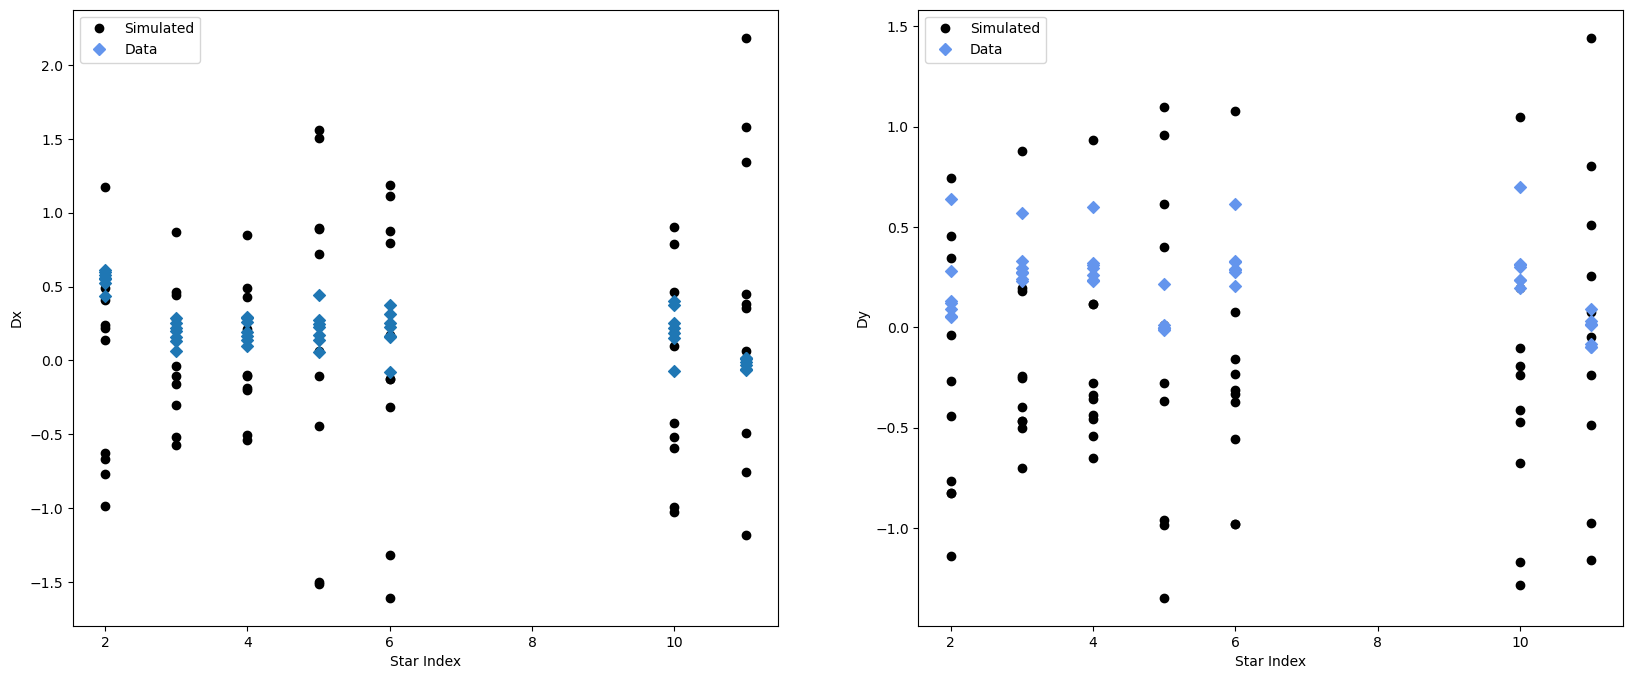

In [6]:
# simulate the displacements for the stars given their star number
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(20,8))

for i, star in enumerate(stars):
    ax0.scatter(star * np.ones(nsims), xs[i], marker="o", color='black')
for dx in [dx_1, dx_2, dx_3, dx_4, dx_5, dx_7, dx_8]:
    ax0.scatter(stars, dx, color="C0", marker="D")
ax0.set_xlabel('Star Index')
ax0.set_ylabel('Dx')
legends = [Line2D([0], [0], lw=0, marker="o", color='black', label='Simulated'),
           Line2D([0], [0], lw=0, marker="D", color="cornflowerblue", label='Data')]
ax0.legend(handles=legends)

for i, star in enumerate(stars):
    ax1.scatter(star * np.ones(nsims), ys[i], marker="o", color='black')
for dy in [dy_1, dy_2, dy_3, dy_4, dy_5, dy_7, dy_8]:
    ax1.scatter(stars, dy, color="cornflowerblue", marker="D")
ax1.set_xlabel('Star Index')
ax1.set_ylabel('Dy')
ax1.legend(handles=legends)

### Likelihood Distribution ###
We assume that the likelihood distribution is a Gaussian but we are propmpted to start with a uniform distribution. So the below shows both examples of these distributions.

In [7]:
# likelihood is assumed to be a Gaussian and we take the log likelihood

# likelihood for plate X
def Likelihood_PlateX_Log(theta, data, sigma_err):
    alpha, a, b, c = theta[0], theta[1], theta[2], theta[3]
    model_x = np.array([Dx_11(alpha, a, b, c),
                        Dx_5(alpha, a, b, c),
                        Dx_4(alpha, a, b, c),
                        Dx_3(alpha, a, b, c),
                        Dx_6(alpha, a, b ,c),
                        Dx_10(alpha, a, b, c),
                        Dx_2(alpha, a, b, c)])
    
    return (-1/2) * np.sum((model_x - data)**2/sigma_err**2)

# likelihood for plate Y (even though we will just consider plate X)
def Likelihood_PlateY_Log(theta, data, sigma_err):
    alpha, d, e, f = theta[0], theta[1], theta[2], theta[3]
    model_y = np.array([Dy_11(alpha, d, e, f),
                        Dy_5(alpha, d, e, f),
                        Dy_4(alpha, d, e, f),
                        Dy_3(alpha, d, e, f),
                        Dy_6(alpha, d, e, f),
                        Dy_10(alpha, d, e, f),
                        Dy_2(alpha, d, e, f)])
    
    return (-1/2) * np.sum((model_y - data)**2/sigma_err**2)

# our target likelihood distribution is plate X since we only want to use Dx
# displacement data
def Target(theta, data, sigma_err):
    return Likelihood_PlateX_Log(theta, data, sigma_err)
    
print(Likelihood_PlateX_Log([1.7, 0., 0., 0.], dx_2, sigma_err=sigma_err),
      Likelihood_PlateY_Log([0.9, 0.1, -0.1, 0.05], dy_5, sigma_err=sigma_err))

def Uniform_Posterior(proposal):
    alphas = np.sqrt(np.diag(proposal))
    return stats.uniform(loc=-alphas * np.sqrt(3), scale=2 * alphas * np.sqrt(3))

def Gaussian_Posterior(proposal):
    return stats.multivariate_normal(np.zeros(proposal.shape[0]), proposal)

def Proposed_Posterior(proposal):
    return Gaussian_Posterior(proposal)

-114.41481733496576 -25.58500598347106


### Metropolis-Hastings ###
Now we implement the Metropolis-Hastings algorithm as discussed in the DISCnet Day 2 training course. 


In [8]:
def Metropolis_Hastings(N, theta_start, data, sigma_err, proposal):
    N_acc = 0
    samples = []
    samples.append(theta_start) # theta start is our initial prior estimation of alpha
    theta = theta_start
    for i in range(N):
        theta_p = theta + Uniform_Posterior(proposal).rvs() # change this for different posterior distributions
        # detailed balance is satisfied so the acceptance ratio is just the
        # Monte Carlo ratio
        x = min(1, np.exp(Target(theta_p, data, sigma_err) - 
                          Target(theta, data, sigma_err)))
        y = stats.uniform().rvs()
        if y < x:
            N_acc += 1
            theta = theta_p
        samples.append(theta)
    return N_acc, np.array(samples)

We will set the hyperparameters of the model and run the model for 1000 Monte Carlo steps. Note that there is a burn-in phase of 100 steps to allow these initial steps to be equilibrium steps. 

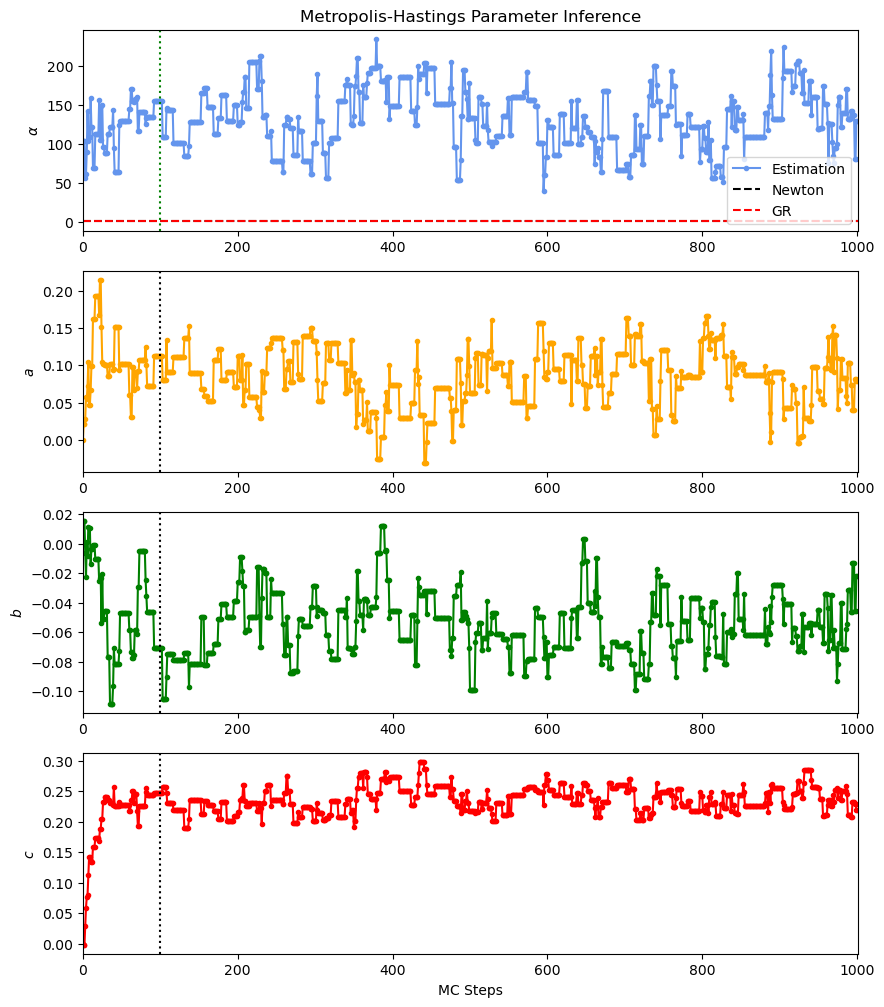

In [9]:
N_steps = 1000
N_equilibrium = 100
proposal_alpha = np.array([8e-1, 4e-2, 2e-2, 2e-2])
proposal_covariance = np.diag(proposal_alpha**2)
theta_start = np.array([1.75, 0., 0., 0.])
N_acc, samples = Metropolis_Hastings(N_steps, theta_start, dx_2, sigma_err, proposal_covariance)
acceptance = float(N_acc)/N_steps

# Plot the parameters
fig, (ax0, ax1, ax2, ax3) = plt.subplots(4, 1, figsize=(10, 12))

ax0.set_xlim(0, N_steps+1)
ax0.set_title('Metropolis-Hastings Parameter Inference')
ax0.set_ylabel("$\\alpha$")
# The units for alpha are weird so we multiply by 45.3
ax0.plot(np.arange(N_steps+1), samples.T[0] * 45.30, marker='.', color='cornflowerblue', label='Estimation')
ax0.axhline(alpha_N, color='black', linestyle='--', label='Newton')
ax0.axhline(alpha_GR, color='red', linestyle='--', label='GR')
ax0.axvline(N_equilibrium, color='green', linestyle=':')
ax0.legend(loc="lower right")

ax1.set_xlim(0, N_steps+1)
ax1.set_ylabel("$a$")
ax1.plot(np.arange(N_steps+1), samples.T[1], marker='.', color='orange')
ax1.axvline(N_equilibrium, color='black', linestyle=':')

ax2.set_xlim(0, N_steps+1)
ax2.set_ylabel("$b$")
ax2.plot(np.arange(N_steps+1), samples.T[2], marker='.', color='green')
ax2.axvline(N_equilibrium, color='black', linestyle=':')

ax3.set_xlim(0, N_steps+1)
ax3.set_xlabel('MC Steps')
ax3.set_ylabel("$c$")
ax3.plot(np.arange(N_steps+1), samples.T[3], marker='.', color='red')
ax3.axvline(N_equilibrium, color='black', linestyle=':')

Now we want to visualise the chain for *a)* a very small proposal distribution and *b)* a very large distribution for a maximum of 1000 steps. We will plot these together to compare how/whether the MC steps converge or not.

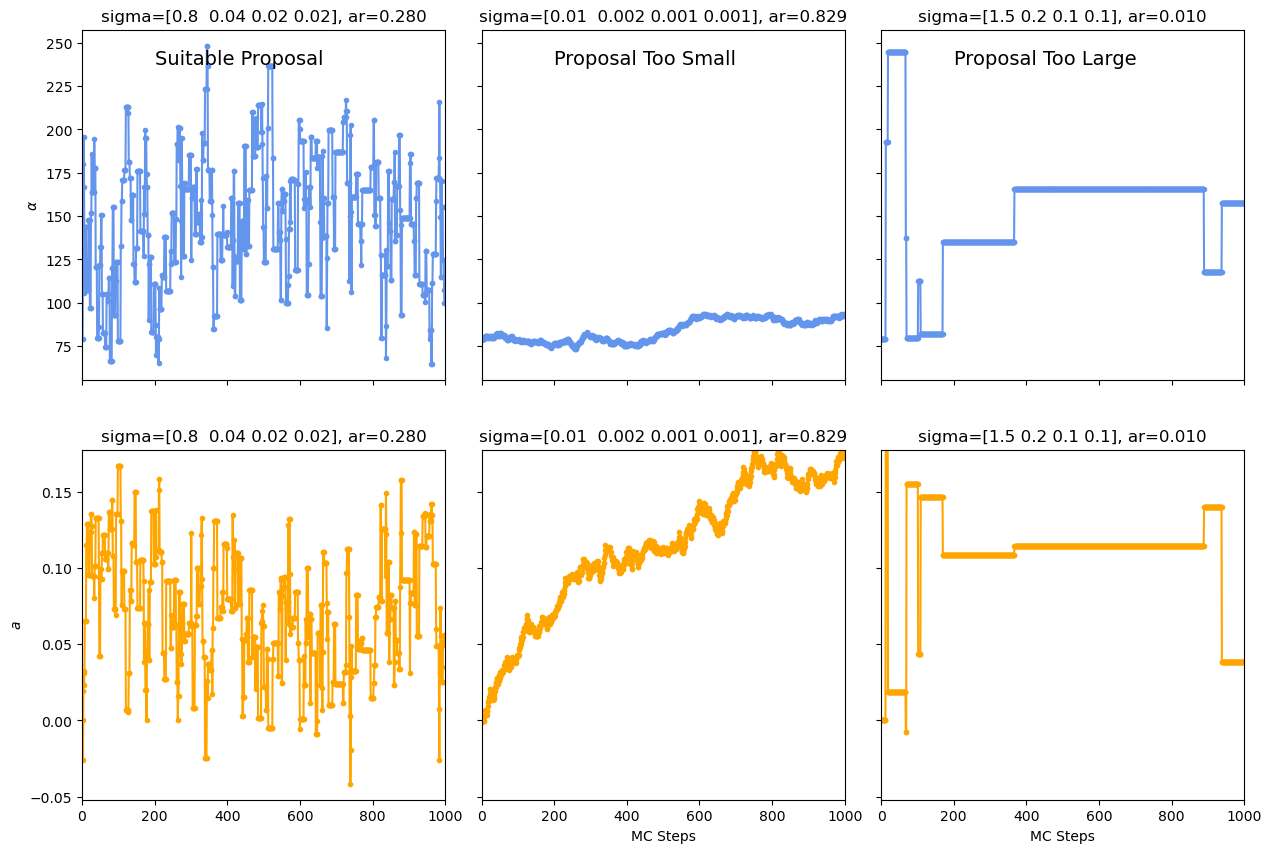

In [10]:
N_steps = 1000
theta_start = np.array([1.75, 0., 0., 0.])

# suitable proposal distribution
proposal_alpha_suitbale = np.array([8e-1, 4e-2, 2e-2, 2e-2])
proposal_covariance_suitbale = np.diag(proposal_alpha_suitbale**2)
N_acc_suitbale, samples_suitbale = Metropolis_Hastings(N_steps, theta_start, dx_2,
                                                       sigma_err, proposal_covariance_suitbale)
acceptance_suitbale = float(N_acc_suitbale)/N_steps

# a) a very small proposal distribution
proposal_alpha_small = np.array([1e-2, 2e-3, 1e-3, 1e-3])
proposal_covariance_small = np.diag(proposal_alpha_small**2)
N_acc_small, samples_small = Metropolis_Hastings(N_steps, theta_start, dx_2,
                                                       sigma_err, proposal_covariance_small)
acceptance_small = float(N_acc_small)/N_steps


# b) very large proposal distribution
proposal_alpha_large = np.array([1.5, 0.2, 0.1, 0.1])
proposal_covariance_large = np.diag(proposal_alpha_large**2)
N_acc_large, samples_large = Metropolis_Hastings(N_steps, theta_start, dx_2,
                                                       sigma_err, proposal_covariance_large)
acceptance_large = float(N_acc_large)/N_steps

# plots
f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharex='col', sharey='row', figsize=(15, 10))

ax1.set_xlim(0, N_steps)
ax1.set_ylabel("$\\alpha$")
ax1.plot(np.arange(N_steps+1), samples_suitbale.T[0]*45.3, marker='.', color='cornflowerblue')
ymin, ymax = ax1.get_ylim()
ax1.set_title("sigma={}, ar={:.3f}".format(proposal_alpha_suitbale, acceptance_suitbale))
ax2.set_xlim(0, N_steps)
ax2.set_ylim(ymin, ymax)
ax2.plot(np.arange(N_steps+1), samples_small.T[0]*45.3, marker='.', color='cornflowerblue')
ax2.set_title("sigma={}, ar={:.3f}".format(proposal_alpha_small, acceptance_small))
ax3.set_xlim(0, N_steps)
ax3.set_ylim(ymin, ymax)
ax3.plot(np.arange(N_steps+1), samples_large.T[0]*45.3, marker='.', color='cornflowerblue')
ax3.set_title("sigma={}, ar={:.3f}".format(proposal_alpha_large, acceptance_large))

ax4.set_xlim(0, N_steps)
ax4.set_ylabel("MC Steps")
ax4.set_ylabel("$a$")
ax4.plot(np.arange(N_steps+1), samples_suitbale.T[1], marker='.', color='orange')
ymin, ymax = ax4.get_ylim()
ax4.set_title("sigma={}, ar={:.3f}".format(proposal_alpha_suitbale, acceptance_suitbale))
ax5.set_xlim(0, N_steps)
ax5.set_ylim(ymin, ymax)
ax5.set_xlabel('MC Steps')
ax5.plot(np.arange(N_steps+1), samples_small.T[1], marker='.', color='orange')
ax5.set_title("sigma={}, ar={:.3f}".format(proposal_alpha_small, acceptance_small))
ax6.set_xlim(0, N_steps)
ax6.set_ylim(ymin, ymax)
ax6.set_xlabel('MC Steps')
ax6.plot(np.arange(N_steps+1), samples_large.T[1], marker='.', color='orange')
ax6.set_title("sigma={}, ar={:.3f}".format(proposal_alpha_large, acceptance_large))

ymin, ymax = ax1.get_ylim()
ax1.text(200, ymax-(ymax-ymin)/10, "Suitable Proposal", fontsize=14)
ax2.text(200, ymax-(ymax-ymin)/10, "Proposal Too Small", fontsize=14)
ax3.text(200, ymax-(ymax-ymin)/10, "Proposal Too Large", fontsize=14)
f.subplots_adjust(wspace=0.1)

For a sensible proposal distribution, the acceptance probability is relatively 
low. We notice that the estimation of *$\alpha$* is between roughly 75 and 200
arcseconds (*$\alpha$* is between $~1.65$ and $~4.4$ when we consider the scaling by 45.3) and *a* is between 0 and 0.20 which is reasonable.

For a very small proposal distribution, the acceptance rate is high meaning
that the parameter estimate is rather like an average and is not accurate. *$\alpha$*
stays at around 75 arcseconds and a looks to have a linear positive correlation
between 0 and 0.2, not in the same way as with the suitable proposal.
 
For very large proposal distribution, the acceptance probability is very high,
meaning that the estimation of *$\alpha$* and *a* is not at all accurate. The MC steps
seem to jump all over the place and do not converge.

Now we want to show how the acceptance probability changes for a proposal distribution of order of magnitude size 0.0001 compared with order of magnitude size 10. Again, we will use 1000 MC steps.

In [11]:
N_steps = 1000
theta_start = np.array([1.75, 0., 0., 0.])

# small proposal distribution of order ~ 1e-4
proposal_alpha_small = np.array([8e-4, 4e-4, 2e-4, 2e-4])
proposal_covariance_small = np.diag(proposal_alpha_small**2)
N_acc_small, samples_small = Metropolis_Hastings(N_steps, theta_start, dx_2,
                                                       sigma_err,
                                                 proposal_covariance_small)
acceptance_small = float(N_acc_small)/N_steps

# large proposal distribution of order 10
proposal_alpha_large = np.array([8, 2, 2, 2])
proposal_covariance_large = np.diag(proposal_alpha_large**2)
N_acc_large, samples_large = Metropolis_Hastings(N_steps, theta_start, dx_2,
                                                       sigma_err,
                                                 proposal_covariance_large)
acceptance_large = float(N_acc_large)/N_steps


print("Acceptance probability for a small proposal distribution: {:.4f}".format(acceptance_small))
print("Acceptance probability for a large proposal distribution: {:.4f}".format(acceptance_large))

Acceptance probability for a small proposal distribution: 0.9240
Acceptance probability for a large proposal distribution: 0.0010


As we can see, the acceptance probability for the proposal distribution of size 0.0001 is high. This does *not* mean that the proposal is suitable. This means that our proposal distribution is too narrow and the Metropolis-Hastings algorithm is not converging and thus, a small proposal distribution leads to a failure mode of the algorithm. We should make the proposal distribution wider.

However, on the other hand, with a proposal distribution of order of size 10, the acceptance probability is near zero. This is bad, meaning that the Metropolis-Hastings algorithm fails to converge here too. Hence, the proposal distribution should be narrower but not as such as above.

We want to compute the average value of the parameters under this suitable proposal distribution and calculate their variance and covariance. 
To do this, we will have to compute multiple MC chains with each chain having a different starting distribution so we can average over them. We will use 5 chains. We are only interested in *$\alpha$, a, b, c* is this exercise.
Again, we will use 1000 MC steps with 350 burn-in steps to equibrilate.

In [13]:
theta_start = np.array([1.75, 0., 0., 0.])

# suitable proposal distribution
# fist initialise different MC chains starting at different positions in
# parameter space
N_steps = 1000
N_equilibrium = 350
proposal_alpha = np.array([8e-1, 4e-2, 2e-2, 2e-2])
proposal_covariance = np.diag(proposal_alpha**2) # covariance matrix with var of alpha on diagonal
N_chains = 5

chains_Dx2 = [Metropolis_Hastings(N_steps, theta_start, dx_2, sigma_err, proposal_covariance) for
              theta_start in np.stack((np.linspace(0., 3., N_chains),
                                       np.linspace(-1., 1., N_chains),
                                       np.linspace(-1., 1., N_chains),
                                       np.linspace(-1., 1., N_chains)), axis=1)]

chain_Dx2 = np.array([chains_Dx2[j][1] for j in range(N_chains)])

# Now remove the equilibrium steps
chain_Dx2_eq = np.array([chains_Dx2[j][1][N_equilibrium:] for j in range(N_chains)])
chain_Dx2_eq_flat = np.concatenate(chain_Dx2_eq, axis=0)

# mean of the parameters (alpha, a, b, c)
print(chain_Dx2_eq.mean(axis=(0,1)))

# marginal standard deviations of parameters (alpha, a, b, c)
print(chain_Dx2_eq.std(axis=(0,1)))

# covariance matrix of parameters (alpha, a, b, c)
print(np.cov(chain_Dx2_eq_flat.T))

[ 3.12517491  0.08030007 -0.05219951  0.23180159]
[0.79538656 0.036854   0.02397052 0.02107283]
[[ 6.32834192e-01 -2.16866663e-02  1.55797491e-03  5.63056071e-03]
 [-2.16866663e-02  1.35863446e-03 -1.64255788e-04 -3.67388708e-04]
 [ 1.55797491e-03 -1.64255788e-04  5.74762367e-04  6.53004903e-05]
 [ 5.63056071e-03 -3.67388708e-04  6.53004903e-05  4.44200585e-04]]


### Marginalisation ###
Now we want to marginalise over the nuisance parameters (we only consider *a, b, c* here) and plot the posterior distribution of *$\alpha$*. 
First, we will need to define functions to marginalise these parameters and compute the credible intervals (contour levels) of the posterior distribution.

In [14]:
# Margins for plotting histograms
nbins = 30
ncontour_levels = 3 # ie. 68%, 95%, 99% confidence intervals
conf_levels = [.3173, .0455, .0027]
sigma = 1

# Functions to marginalise over the nuisance parameters and to calculate the
# confidence/credible intervals

def Marginal(samples):
    # create a 1-d histogram
    hist1d, edges = np.histogram(samples, weights=np.ones_like(samples),
                                 density=True, bins=nbins)
    # center between histogram edges
    center = (edges[1:] + edges[:-1])/2
    
    # filter the data
    pdf = np.array((center, hist1d))
    pdf = scipy.ndimage.gaussian_filter1d(pdf, sigma=sigma)
    
    # clip the pdf to zero the bins
    center, hist = pdf[0], pdf[1]
    center = np.insert(center, 0, center[0] - (center[1] - center[0]))
    hist = np.insert(hist, 0, 0.)
    center = np.insert(center, len(center), center[len(center) - 1] - (center[len(center) - 2] - center[len(center) - 1]))
    hist = np.insert(hist, len(hist), 0.)
    
    # normalise all the pdfs to the same height
    hist /= hist.max()
    pdf = np.array((center, hist))
    return pdf

# get the confidence/credible intervals
def Confidence(samples_x, samples_y):
    # initialise empty arrays
    levels = np.ones(ncontour_levels + 1)
    # compute confidence level bins
    nbins_conf = np.linspace(0., nbins**2, nbins**2)
    # create 2d histogram
    hist2d, xedges, yedges = np.histogram2d(samples_x, samples_y, weights=np.ones_like(samples_x),
                                            bins=nbins)
    # normalise this
    hist2d = hist2d/np.sum(hist2d)
    # create a cumulative 1d distribution
    hist0 = np.sort(hist2d.flat)
    hist_cumulative = np.cumsum(hist0)
    # compute the confidence/credible levels (starting with 68%)
    for i in range(ncontour_levels):
        # find location of level in 1d hist_cumulative
        temp = np.interp(conf_levels[i], hist_cumulative, nbins_conf)
        # find depth of level
        levels[ncontour_levels - 1 - i] = np.interp(temp, nbins_conf, hist0)
    
    # Gaussian smoothe
    contours = scipy.ndimage.gaussian_filter(hist2d.T, sigma=sigma)
    xbins = (xedges[1:] + xedges[:-1])/2
    ybins = (yedges[1:] + yedges[:-1])/2
    
    return xbins, ybins, contours, levels

Now, we can use the Metropolis-Hastings algorithm to plot the posterior distribution of *$\alpha$* using the above functions to marginalise over the nuisance parameters. We will use the same suitable distribution as given above and also plot the value for alpha given by Einstein and Newton, labelled *GR* and *Newton*, respectively.

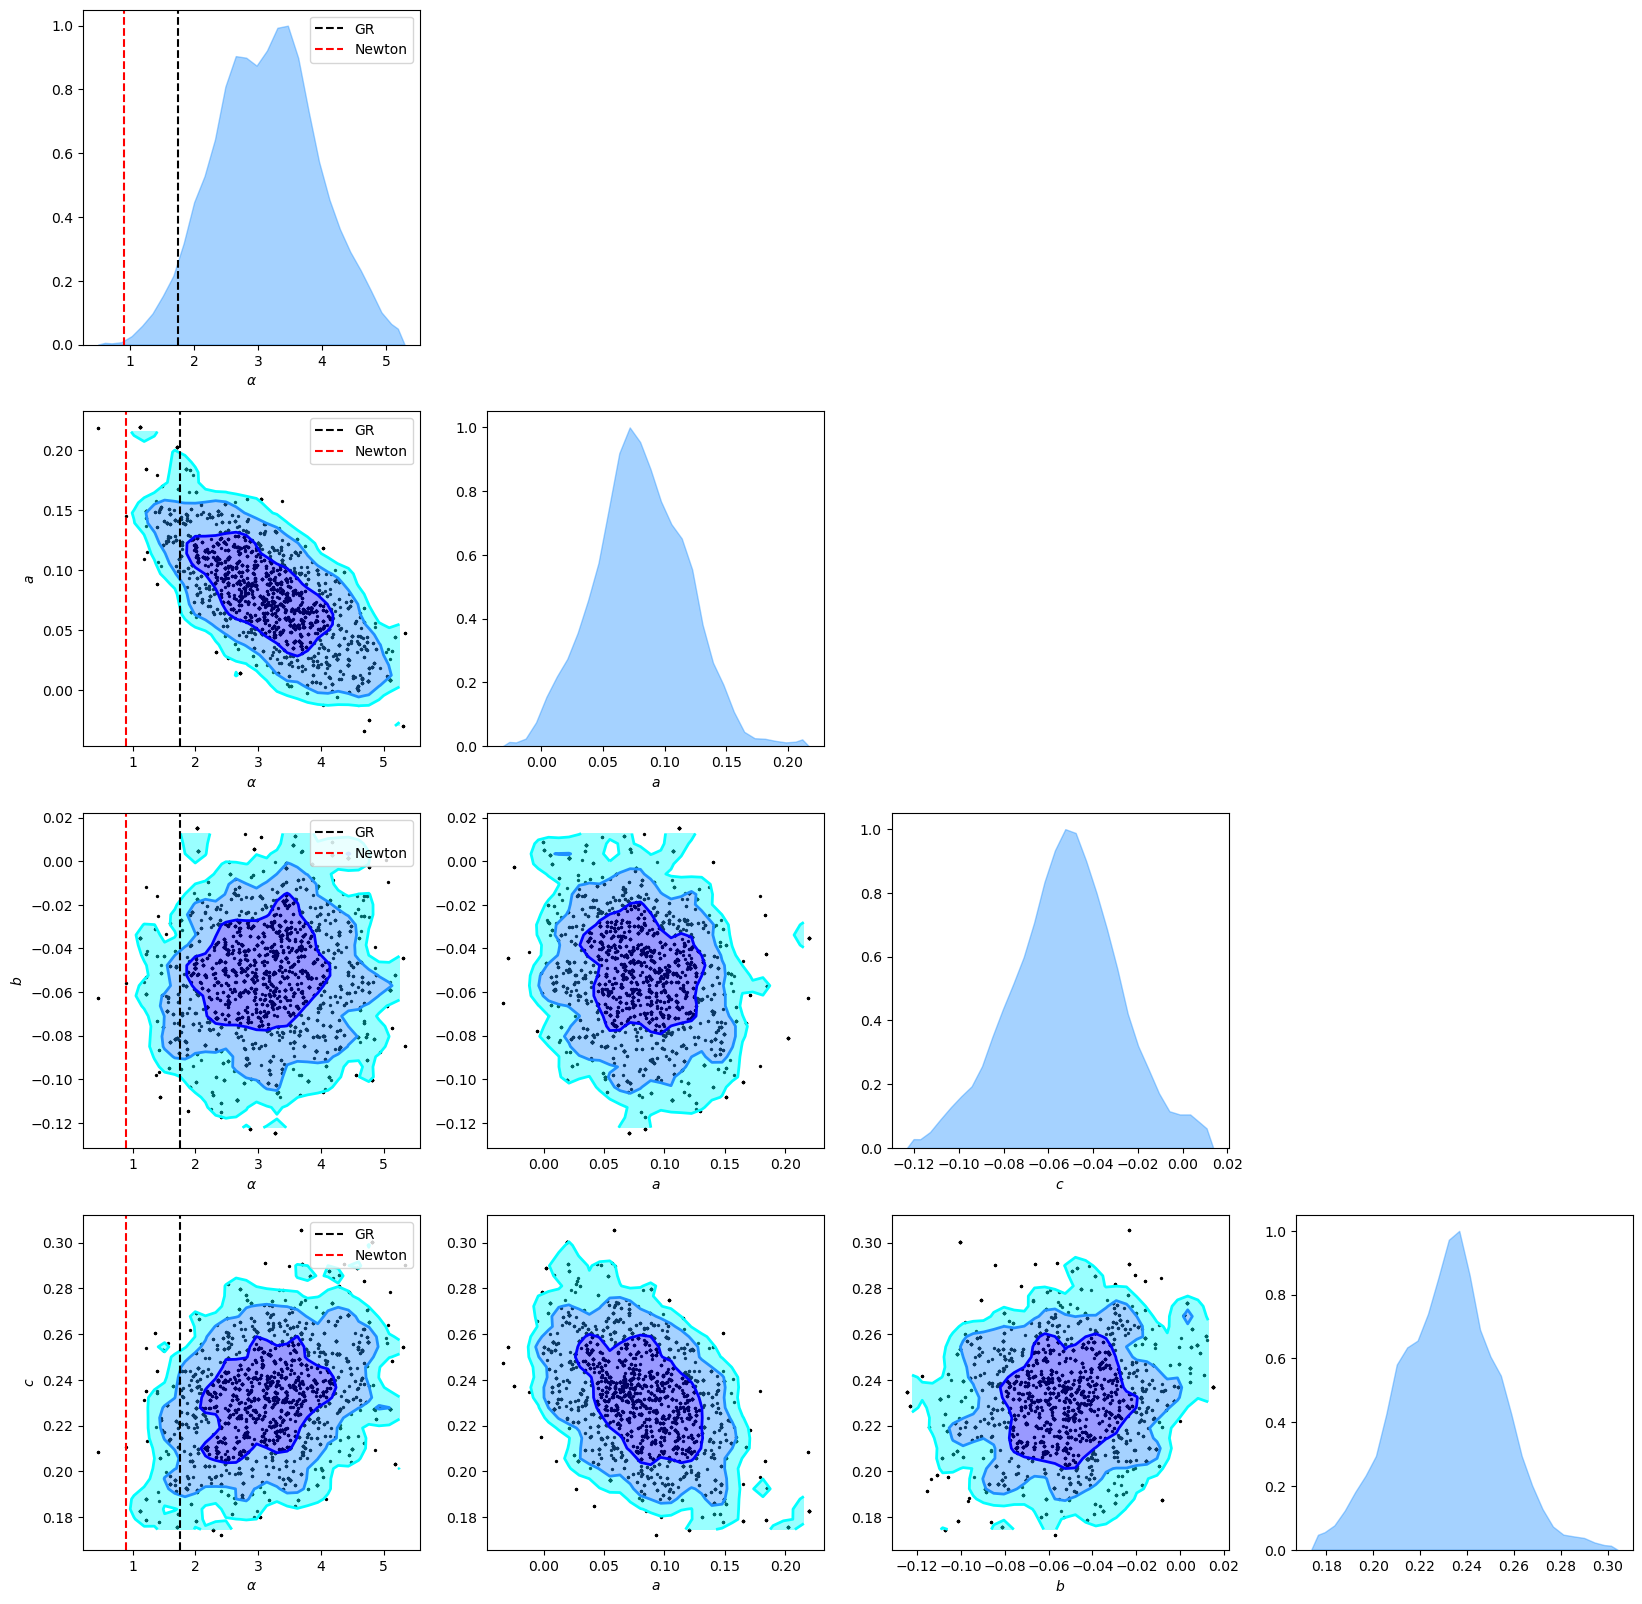

In [15]:
# Using the above suitable distribution, we marginalise over the nuisance
# parameters and will plot the posterior chain 

fig = plt.figure(figsize=(20,20))

# plot the 1d marginal distributions
ax0 = fig.add_subplot(4, 4, 1)
posterior_alpha = Marginal(chain_Dx2_eq_flat.T[0])
ax0.fill_between(posterior_alpha[0], posterior_alpha[1], 0, color='dodgerblue', alpha=.4)
ax0.set_ylim(0., posterior_alpha[1].max() * 1.05)
ax0.axvline(alpha_GR, color='black', linestyle='--', label='GR')
ax0.axvline(alpha_N, color='red', linestyle='--', label='Newton')
ax0.set_xlabel("$\\alpha$")
ax0.legend(loc='upper right')

ax1 = fig.add_subplot(4, 4, 6)
posterior_a = Marginal(chain_Dx2_eq_flat.T[1])
ax1.fill_between(posterior_a[0], posterior_a[1], 0, color='dodgerblue', alpha=.4)
ax1.set_ylim(0., posterior_a[1].max() * 1.05)
ax1.set_xlabel("$a$")

ax2 = fig.add_subplot(4, 4, 11)
posterior_b = Marginal(chain_Dx2_eq_flat.T[2])
ax2.fill_between(posterior_b[0], posterior_b[1], 0, color='dodgerblue', alpha=.4)
ax2.set_ylim(0., posterior_b[1].max() * 1.05)
ax2.set_xlabel("$b$")

ax3 = fig.add_subplot(4, 4, 16)
posterior_c = Marginal(chain_Dx2_eq_flat.T[3])
ax3.fill_between(posterior_c[0], posterior_c[1], 0, color='dodgerblue', alpha=.4)
ax3.set_ylim(0., posterior_c[1].max() * 1.05)
ax2.set_xlabel("$c$")

# plot the 2d confidence intervals
ax0a = fig.add_subplot(4, 4, 5)
ax0a.scatter(chain_Dx2_eq_flat.T[0], chain_Dx2_eq_flat.T[1], color='black', s=2)
xbins, ybins, contours, confidence_l = Confidence(chain_Dx2_eq_flat.T[0], chain_Dx2_eq_flat.T[1])
ax0a.contourf(xbins, ybins, contours, levels=confidence_l, colors=('cyan', 'dodgerblue', 'b'), alpha=.4)
ax0a.contour(xbins, ybins, contours, levels=confidence_l, colors=('cyan', 'dodgerblue', 'b'), linewidths=2)
ax0a.axvline(alpha_GR, color='black', linestyle='--', label='GR')
ax0a.axvline(alpha_N, color='red', linestyle='--', label='Newton')
ax0a.set_xlabel("$\\alpha$")
ax0a.set_ylabel("$a$")
ax0a.legend(loc='upper right')

ax1a = fig.add_subplot(4, 4, 9)
ax1a.scatter(chain_Dx2_eq_flat.T[0], chain_Dx2_eq_flat.T[2], color='black', s=2)
xbins, ybins, contours, confidence_l = Confidence(chain_Dx2_eq_flat.T[0], chain_Dx2_eq_flat.T[2])
ax1a.contourf(xbins, ybins, contours, levels=confidence_l, colors=('cyan', 'dodgerblue', 'b'), alpha=.4)
ax1a.contour(xbins, ybins, contours, levels=confidence_l, colors=('cyan', 'dodgerblue', 'b'), linewidths=2)
ax1a.axvline(alpha_GR, color='black', linestyle='--', label='GR')
ax1a.axvline(alpha_N, color='red', linestyle='--', label='Newton')
ax1a.set_xlabel("$\\alpha$")
ax1a.set_ylabel("$b$")
ax1a.legend(loc='upper right')

ax1b = fig.add_subplot(4, 4, 10)
ax1b.scatter(chain_Dx2_eq_flat.T[1], chain_Dx2_eq_flat.T[2], color='black', s=2)
xbins, ybins, contours, confidence_l = Confidence(chain_Dx2_eq_flat.T[1], chain_Dx2_eq_flat.T[2])
ax1b.contourf(xbins, ybins, contours, levels=confidence_l, colors=('cyan', 'dodgerblue', 'b'), alpha=.4)
ax1b.contour(xbins, ybins, contours, levels=confidence_l, colors=('cyan', 'dodgerblue', 'b'), linewidths=2)
ax1b.set_xlabel("$a$")


ax2a = fig.add_subplot(4, 4, 13)
ax2a.scatter(chain_Dx2_eq_flat.T[0], chain_Dx2_eq_flat.T[3], color='black', s=2)
xbins, ybins, contours, confidence_l = Confidence(chain_Dx2_eq_flat.T[0], chain_Dx2_eq_flat.T[3])
ax2a.contourf(xbins, ybins, contours, levels=confidence_l, colors=('cyan', 'dodgerblue', 'b'), alpha=.4)
ax2a.contour(xbins, ybins, contours, levels=confidence_l, colors=('cyan', 'dodgerblue', 'b'), linewidths=2)
ax2a.axvline(alpha_GR, color='black', linestyle='--', label='GR')
ax2a.axvline(alpha_N, color='red', linestyle='--', label='Newton')
ax2a.set_xlabel("$\\alpha$")
ax2a.set_ylabel("$c$")
ax2a.legend(loc='upper right')

ax2b = fig.add_subplot(4, 4, 14)
ax2b.scatter(chain_Dx2_eq_flat.T[1], chain_Dx2_eq_flat.T[3], color='black', s=2)
xbins, ybins, contours, confidence_l = Confidence(chain_Dx2_eq_flat.T[1], chain_Dx2_eq_flat.T[3])
ax2b.contourf(xbins, ybins, contours, levels=confidence_l, colors=('cyan', 'dodgerblue', 'b'), alpha=.4)
ax2b.contour(xbins, ybins, contours, levels=confidence_l, colors=('cyan', 'dodgerblue', 'b'), linewidths=2)
ax2b.set_xlabel("$a$")

ax2c = fig.add_subplot(4, 4, 15)
ax2c.scatter(chain_Dx2_eq_flat.T[2], chain_Dx2_eq_flat.T[3], color='black', s=2)
xbins, ybins, contours, confidence_l = Confidence(chain_Dx2_eq_flat.T[2], chain_Dx2_eq_flat.T[3])
ax2c.contourf(xbins, ybins, contours, levels=confidence_l, colors=('cyan', 'dodgerblue', 'b'), alpha=.4)
ax2c.contour(xbins, ybins, contours, levels=confidence_l, colors=('cyan', 'dodgerblue', 'b'), linewidths=2)
ax2c.set_xlabel("$b$")

plt.show()

### Nuisance Parameters ###
Let's see what happens if we *do not* marginalise over nuisance parameters and instead, set them close to zero.
Again, we will use sample with multiple Metropolis-Hastings chains starting at different positions in parameter space with nuisance parameters set close to zero. We will concatenate these chains and flatten them, so that they can be plotted. Also plotted is the value for *$\alpha$* from Einstein's theory and Newton's theory, respectively. We have used 1000 MC steps not including the 100 burn-in steps that are used to equilbrilate each MC chain.

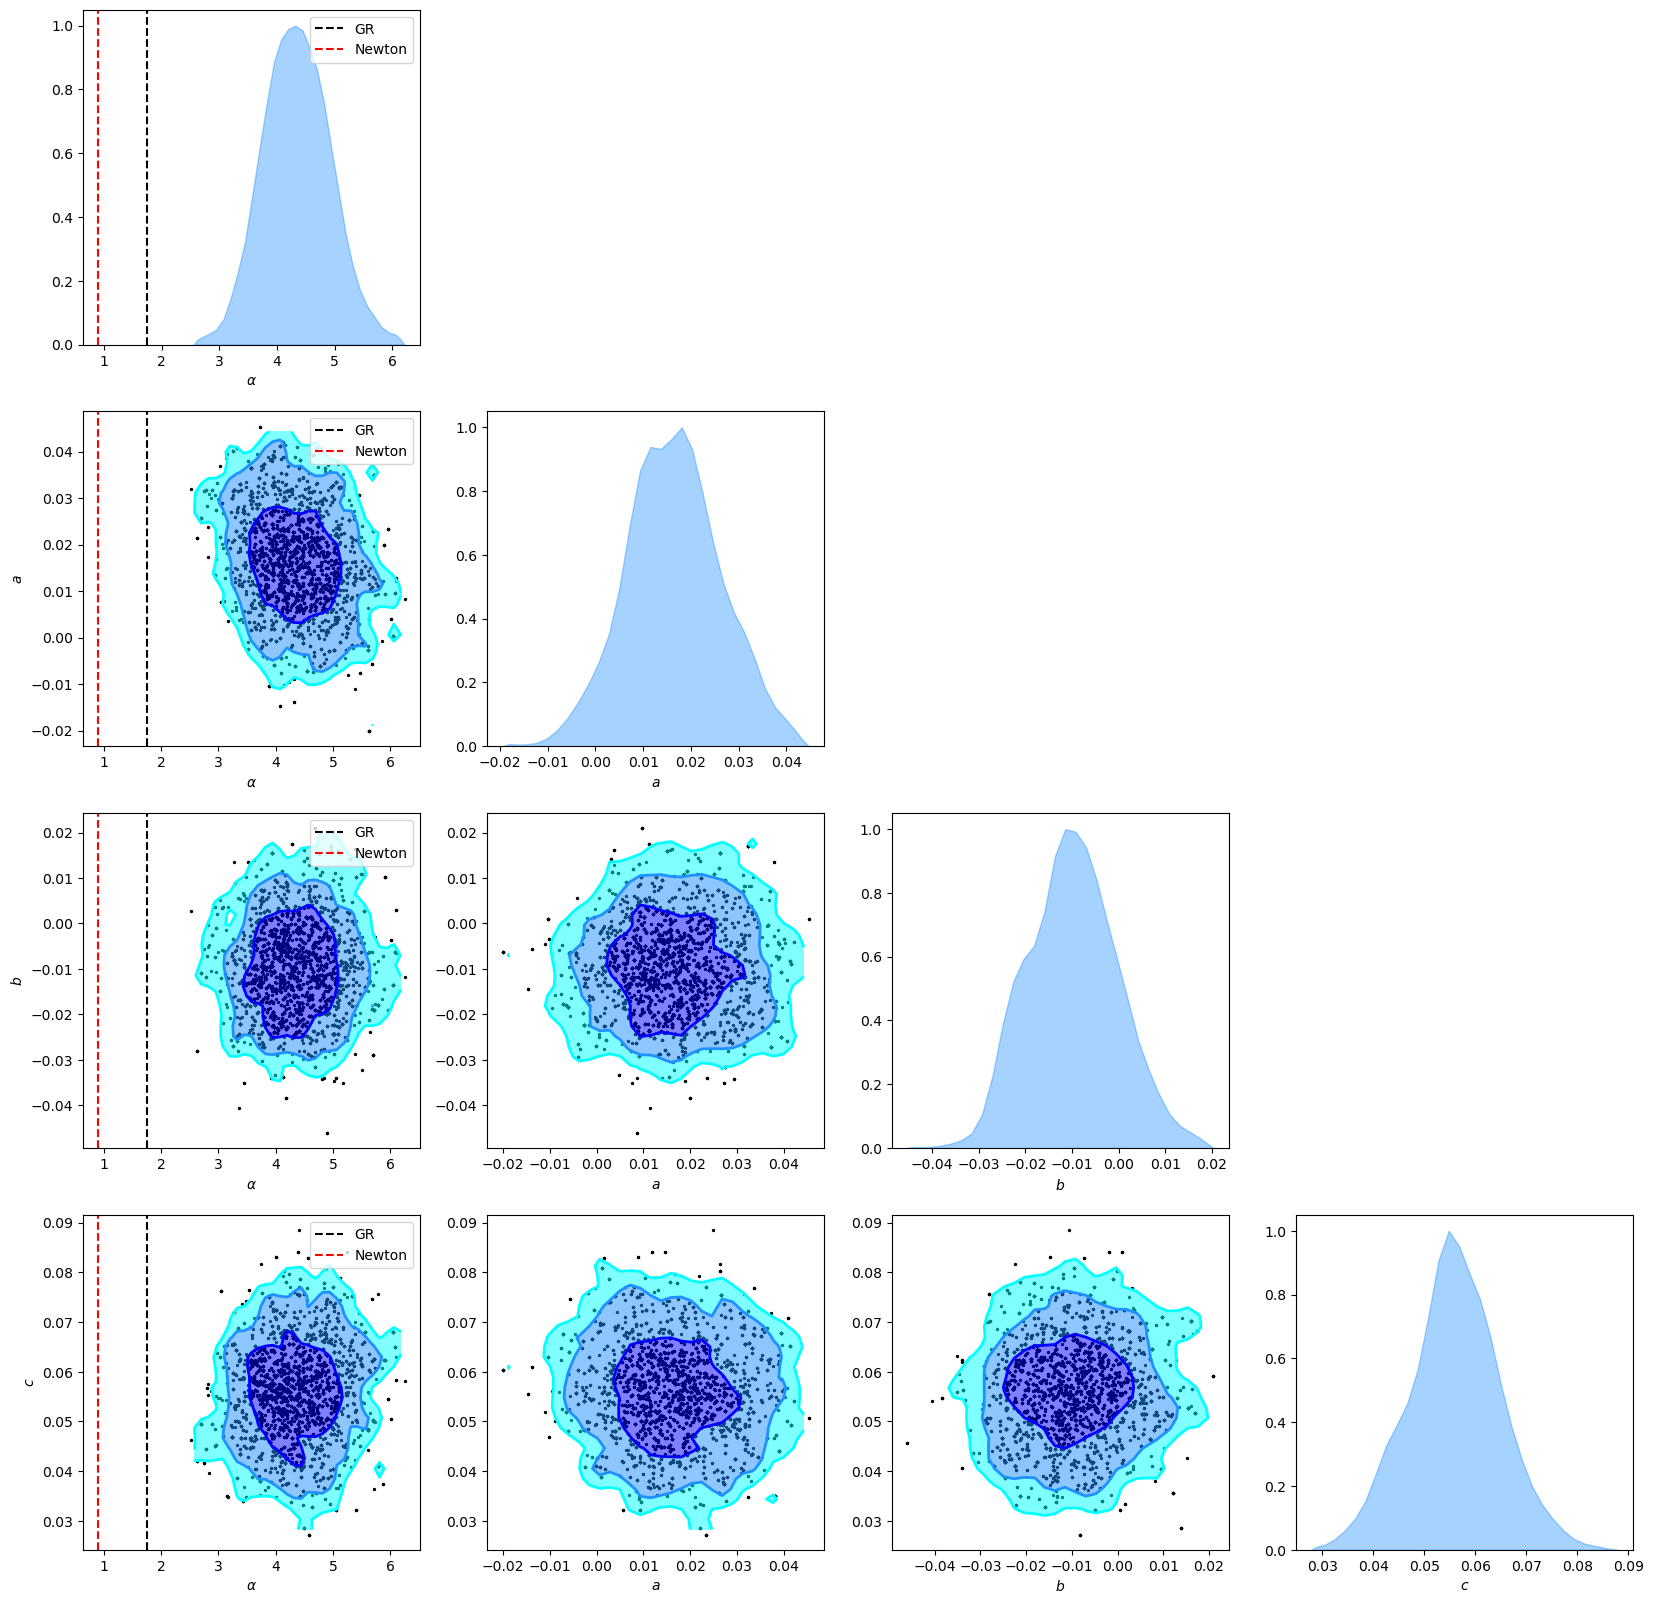

In [16]:
# We now include a strong prior that nuisance parameters are close to zero

def Log_Prior(theta):
    alpha, a, b, c = theta[0], theta[1], theta[2], theta[3]
    return stats.multivariate_normal([0., 0., 0.,], np.diag(np.array([1e-2, 1e-2, 1e-2])**2)).logpdf([a,b,c])

def Target(theta, data, sigma_err):
    return Log_Prior(theta) + Likelihood_PlateX_Log(theta, data, sigma_err)

N_steps = 1000
N_equilibrium = 100
proposal_alpha = np.array([8e-1, 1e-2, 1e-2, 1e-2])
proposal_covariance = np.diag(proposal_alpha**2)
N_chains = 5

# Run the MCMC chains starting at different positions in parameter space
chains_nuisance = [Metropolis_Hastings(N_steps, theta_start, [dx_2], sigma_err, proposal_covariance) for
                   theta_start in np.stack((np.linspace(0., 3., N_chains),
                                            np.linspace(-1e-2, 1e-2, N_chains),
                                            np.linspace(-1e-2, 1e-2, N_chains),
                                            np.linspace(-1e-2, 1e-2, N_chains)), axis=1)]

chain_nuisance = np.array([chains_nuisance[i][1] for i in range(N_chains)])

# Now remove the equilibrium steps
chain_nuisance_eq = np.array([chains_nuisance[i][1][N_equilibrium:] for i in range(N_chains)])
chain_nuisance_eq_flat = np.concatenate(chain_nuisance_eq, axis=0)

# plot 1d marginal distributions
fig = plt.figure(figsize=(20,20))

ax0 = fig.add_subplot(4, 4, 1)
posterior_alpha = Marginal(chain_nuisance_eq_flat.T[0])
ax0.fill_between(posterior_alpha[0], posterior_alpha[1], 0, color='dodgerblue', alpha=.4)
ax0.set_ylim(0., posterior_alpha[1].max() *1.05)
ax0.axvline(alpha_GR, color='black', linestyle='--', label='GR')
ax0.axvline(alpha_N, color='red', linestyle='--', label='Newton')
ax0.set_xlabel("$\\alpha$")
ax0.legend(loc='upper right')

ax1 = fig.add_subplot(4, 4, 6)
posterior_a = Marginal(chain_nuisance_eq_flat.T[1])
ax1.fill_between(posterior_a[0], posterior_a[1], 0., color='dodgerblue', alpha=.4)
ax1.set_ylim(0., posterior_a[1].max() * 1.05)
ax1.set_xlabel("$a$")

ax2 = fig.add_subplot(4, 4, 11)
posterior_b = Marginal(chain_nuisance_eq_flat.T[2])
ax2.fill_between(posterior_b[0], posterior_b[1], 0., color='dodgerblue', alpha=.4)
ax2.set_ylim(0., posterior_b[1].max() * 1.05)
ax2.set_xlabel("$b$")
                   
ax3 = fig.add_subplot(4, 4, 16)
posterior_c = Marginal(chain_nuisance_eq_flat.T[3])
ax3.fill_between(posterior_c[0], posterior_c[1], 0., color='dodgerblue', alpha=.4)
ax3.set_ylim(0., posterior_c[1].max() * 1.05)
ax3.set_xlabel("$c$")

# Now plot the 2d contours
ax0a = fig.add_subplot(4, 4, 5)
ax0a.scatter(chain_nuisance_eq_flat.T[0], chain_nuisance_eq_flat.T[1], color='black', s=2)
xbins, ybins, contours, confidence_l = Confidence(chain_nuisance_eq_flat.T[0], chain_nuisance_eq_flat.T[1])
ax0a.contourf(xbins, ybins, contours, levels=confidence_l, colors=('cyan', 'dodgerblue', 'b'), alpha=.5)
ax0a.contour(xbins, ybins, contours, levels=confidence_l, colors=('cyan', 'dodgerblue', 'b'), linewidths=2)
ax0a.axvline(alpha_GR, color='black', linestyle='--', label='GR')
ax0a.axvline(alpha_N, color='red', linestyle='--', label='Newton')
ax0a.set_xlabel("$\\alpha$")
ax0a.set_ylabel("$a$")
ax0a.legend(loc='upper right')

ax1a = fig.add_subplot(4, 4, 9)
ax1a.scatter(chain_nuisance_eq_flat.T[0], chain_nuisance_eq_flat.T[2], color='black', s=2)
xbins, ybins, contours, confidence_l = Confidence(chain_nuisance_eq_flat.T[0], chain_nuisance_eq_flat.T[2])
ax1a.contourf(xbins, ybins, contours, levels=confidence_l, colors=('cyan', 'dodgerblue', 'b'), alpha=.5)
ax1a.contour(xbins, ybins, contours, levels=confidence_l, colors=('cyan', 'dodgerblue', 'b'), linewidths=2)
ax1a.axvline(alpha_GR, color='black', linestyle='--', label='GR')
ax1a.axvline(alpha_N, color='red', linestyle='--', label='Newton')
ax1a.set_xlabel("$\\alpha$")
ax1a.set_ylabel("$b$")
ax1a.legend(loc='upper right')

ax1b = fig.add_subplot(4, 4, 10)
ax1b.scatter(chain_nuisance_eq_flat.T[1], chain_nuisance_eq_flat.T[2], color='black', s=2)
xbins, ybins, contours, confidence_l = Confidence(chain_nuisance_eq_flat.T[1], chain_nuisance_eq_flat.T[2])
ax1b.contourf(xbins, ybins, contours, levels=confidence_l, colors=('cyan', 'dodgerblue', 'b'), alpha=.5)
ax1b.contour(xbins, ybins, contours, levels=confidence_l, colors=('cyan', 'dodgerblue', 'b'), linewidths=2)
ax1b.set_xlabel("$a$")

ax2a = fig.add_subplot(4, 4, 13)
ax2a.scatter(chain_nuisance_eq_flat.T[0], chain_nuisance_eq_flat.T[3], color='black', s=2)
xbins, ybins, contours, confidence_l = Confidence(chain_nuisance_eq_flat.T[0], chain_nuisance_eq_flat.T[3])
ax2a.contourf(xbins, ybins, contours, levels=confidence_l, colors=('cyan', 'dodgerblue', 'b'), alpha=.5)
ax2a.contour(xbins, ybins, contours, levels=confidence_l, colors=('cyan', 'dodgerblue', 'b'), linewidths=2)
ax2a.axvline(alpha_GR, color='black', linestyle='--', label='GR')
ax2a.axvline(alpha_N, color='red', linestyle='--', label='Newton')
ax2a.set_xlabel("$\\alpha$")
ax2a.set_ylabel("$c$")
ax2a.legend(loc='upper right')

ax2b = fig.add_subplot(4, 4, 14)
ax2b.scatter(chain_nuisance_eq_flat.T[1], chain_nuisance_eq_flat.T[3], color='black', s=2)
xbins, ybins, contours, confidence_l = Confidence(chain_nuisance_eq_flat.T[1], chain_nuisance_eq_flat.T[3])
ax2b.contourf(xbins, ybins, contours, levels=confidence_l, colors=('cyan', 'dodgerblue', 'b'), alpha=.5)
ax2b.contour(xbins, ybins, contours, levels=confidence_l, colors=('cyan', 'dodgerblue', 'b'), linewidths=2)
ax2b.set_xlabel("$a$")

ax2c = fig.add_subplot(4, 4, 15)
ax2c.scatter(chain_nuisance_eq_flat.T[2], chain_nuisance_eq_flat.T[3], color='black', s=2)
xbins, ybins, contours, confidence_l = Confidence(chain_nuisance_eq_flat.T[2], chain_nuisance_eq_flat.T[3])
ax2c.contourf(xbins, ybins, contours, levels=confidence_l, colors=('cyan', 'dodgerblue', 'b'), alpha=.5)
ax2c.contour(xbins, ybins, contours, levels=confidence_l, colors=('cyan', 'dodgerblue', 'b'), linewidths=2)
ax2c.set_xlabel("$b$")

plt.show()

Einstein's GR value of *$\alpha=1.75$* is excluded with this prior on nuisance parameters.
The posterior of *c* largely excludes the prior mean (*c=0*) which is a sign of an issue in this analysis.

### Optional Question ###
We want to apply the Gelman-Rubin convergence test to our analysis. This method is just the exact implementation of the equations given in the question sheet evaluated on the concatenated chains for displacements in the X-direction.

The Gelman-Rubin convergence test consists of:
Parameters:
m: the number of chains
n: the length of chains

Definitions:  
Between chain variance:
        
\begin{equation}
    B = \frac{n}{m-1} \sum_{j=1}^{m} \hat{\psi}_{j} - \hat{\psi}^2
\end{equation}

where,
\begin{equation}
    \hat{\psi}_{j}=\frac{1}{n} \sum_{i=1}^{n} {\psi_{ij}}
\end{equation}

Within chains variance:

\begin{equation}
W = \frac{1}{m} \sum_{j=1}^{m} s_{j}^2
\end{equation}

where,
\begin{equation}
    s_{j}^2 = \frac{1}{n-1} \sum_{i=1}^{n} (\psi_{ij} - \hat{\psi})^2
\end{equation}

Estimators:
Estimators of the marginal posterior variances of the estimated:
\begin{equation}
    \hat{var_{-}}=W
\end{equation}
which underestimates the variance, and:
\begin{equation}
    \hat{var_{+}}=\frac{n}{n-1}W+\frac{1}{n}B
\end{equation}
which overestimates the variance.

The test:
Potential scale reduction factor $\hat{R}$, where:
\begin{equation}
    \hat{R}=\sqrt{\frac{\hat{var_{+}}}{\hat{var_{-}}}}
\end{equation}

The test is such that $\hat{R}\to 1$ as $n \to \inf$.


In [17]:
def Gelman_Rubin(chain):
    # Between chains variance
    # 'chain' must have dimensions (nchains, nsamples, nparameters)
    psi_hat_j = np.mean(chain, axis=1)
    psi_hat = np.mean(psi_hat_j, axis=0)
    m = chain.shape[0]
    n = chain.shape[1]
    B = n/(m-1) * np.sum((psi_hat_j - psi_hat)**2, axis=0)
    
    # within chains variance
    sj2 = np.var(chain, axis=1, ddof=1)
    W = np.mean(sj2, axis=0)
    
    # estimators 
    minus_var = W
    plus_var = (n-1)/n * W + (1/n) * B
    R_hat = np.sqrt(plus_var/minus_var)
    
    return R_hat

print(Gelman_Rubin(chain_Dx2))

[1.0186361  1.02106113 1.11083548 1.09924627]
